In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import sys
import seaborn as sb
import math
from matplotlib.ticker import LinearLocator


In [2]:
sys.path.append(r'C:\Users\Joar\Documents\1_Education\NTNU\OneDrive - NTNU\Thesis\Modelling\FD Model')

In [3]:
from FloaterParameters import FloaterParameters
from Environment import Environment
from Buoy import Buoy
from Mass import Mass
from Density import Density
from Area import Area
from GlobalCoordinateSystem import GlobalCoordinateSystem
from SystemMatrices import MatrixCalculation
from ComputeHydroCoefficients import CompHydroCoefficient
from plot_hydroD_results import plot_hydroD_results
from ReadWadamLis import ReadWadamLis
from CheckInterpolation import InterpolateParameters

Unable to import mpi4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.


In [4]:
# To be used if running simulations
interpolate = 0
pull_results = 0
write = 1
run = 1
x_space = np.arange(20,110,10)
y_space = np.arange(20,110,10)
draft = [14]
column_diameter = [11,12,13,14]

In [5]:
x_space = [58.5]
y_space = [67.55]
column_diameter = [12.8]
draft = [19.15]

In [6]:
if interpolate == 1:
    # To be used if pulling saved files
    #pull = np.array([[50,60,12]])
    pull = np.array([[60,80,13]])
                #First value corresponds to variable you want to interpolate, second value corresponds to index of interpolation
    interp_at = [2,13]
    inter = InterpolateParameters(pull, interp_at)
    #inter._plot_interpolation(pull, interp_at)

In [7]:
reflection = 1
sectional_loads = 0
fixed = 0

one
HydroD


C:\Users\Joar\Documents\1_Education\NTNU\OneDrive - NTNU\Thesis\Modelling\FD Model\ReadWadamLis.py:305: ComplexWarning: Casting complex values to real discards the imaginary part
  self.panel_pressure[aa, bb, kk, 11] = self.panel_disc[1, int(self.panel_pressure[aa, bb, kk, 0]) - 1]
C:\Users\Joar\Documents\1_Education\NTNU\OneDrive - NTNU\Thesis\Modelling\FD Model\ReadWadamLis.py:307: ComplexWarning: Casting complex values to real discards the imaginary part
  self.panel_pressure[aa, bb, kk, 12] = (self.panel_pressure[aa, bb, kk, 7] + 1j*self.panel_pressure[aa, bb, kk, 8]) * self.panel_pressure[aa, bb, kk, 11] * self.panel_disc[2, int(self.panel_pressure[aa, bb, kk, 0]) - 1]
C:\Users\Joar\Documents\1_Education\NTNU\OneDrive - NTNU\Thesis\Modelling\FD Model\ReadWadamLis.py:308: ComplexWarning: Casting complex values to real discards the imaginary part
  self.panel_pressure[aa, bb, kk, 13] = (self.panel_pressure[aa, bb, kk, 7] + 1j*self.panel_pressure[aa, bb, kk, 8]) * self.panel_pressure

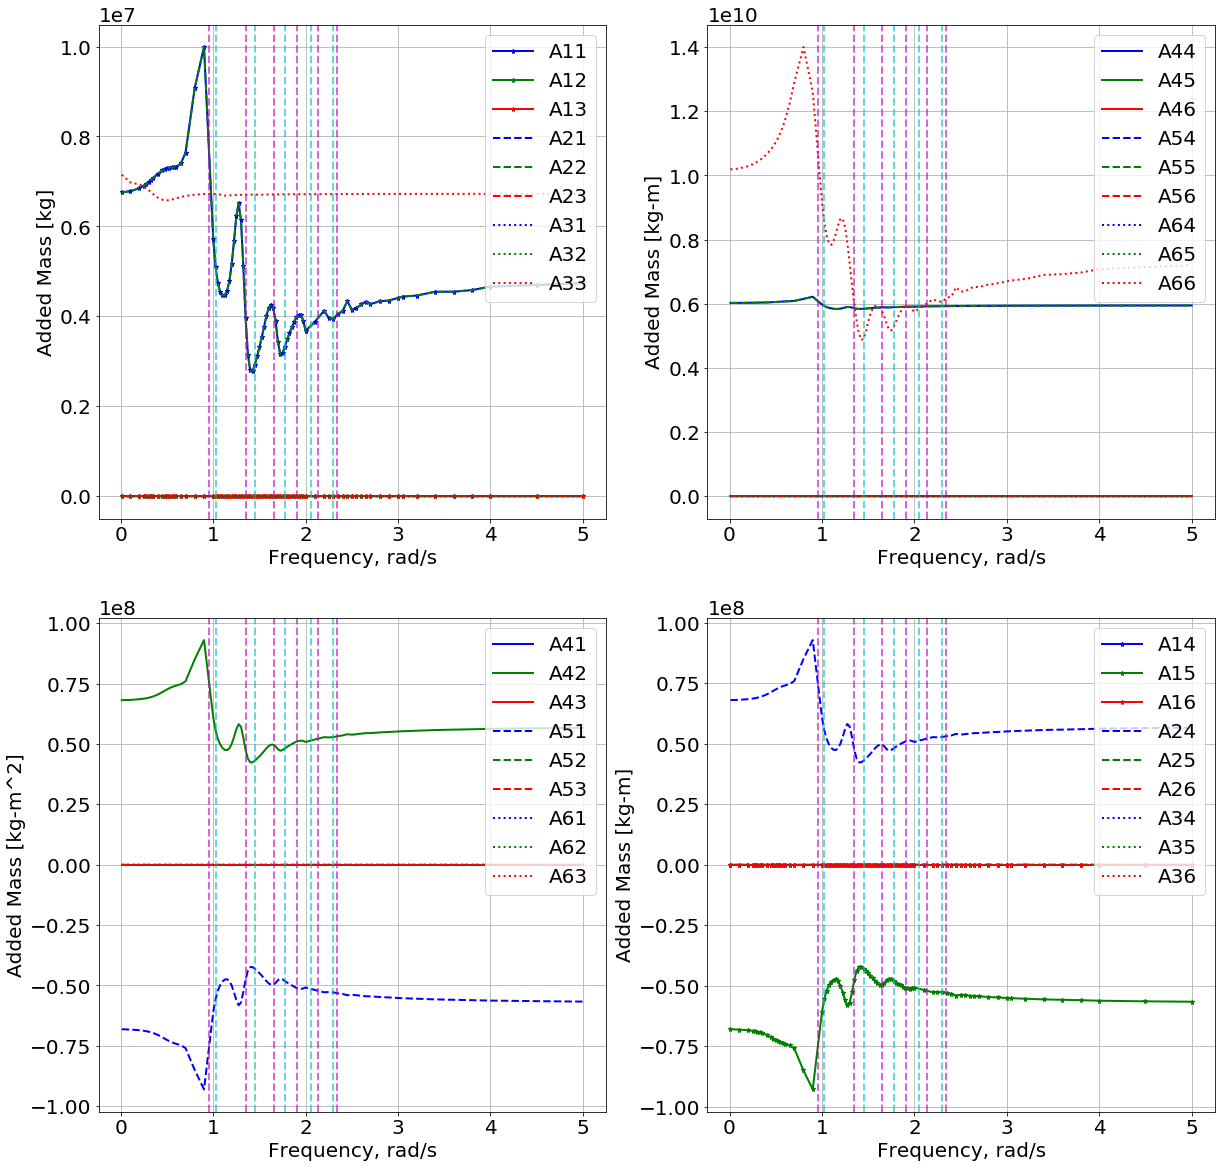

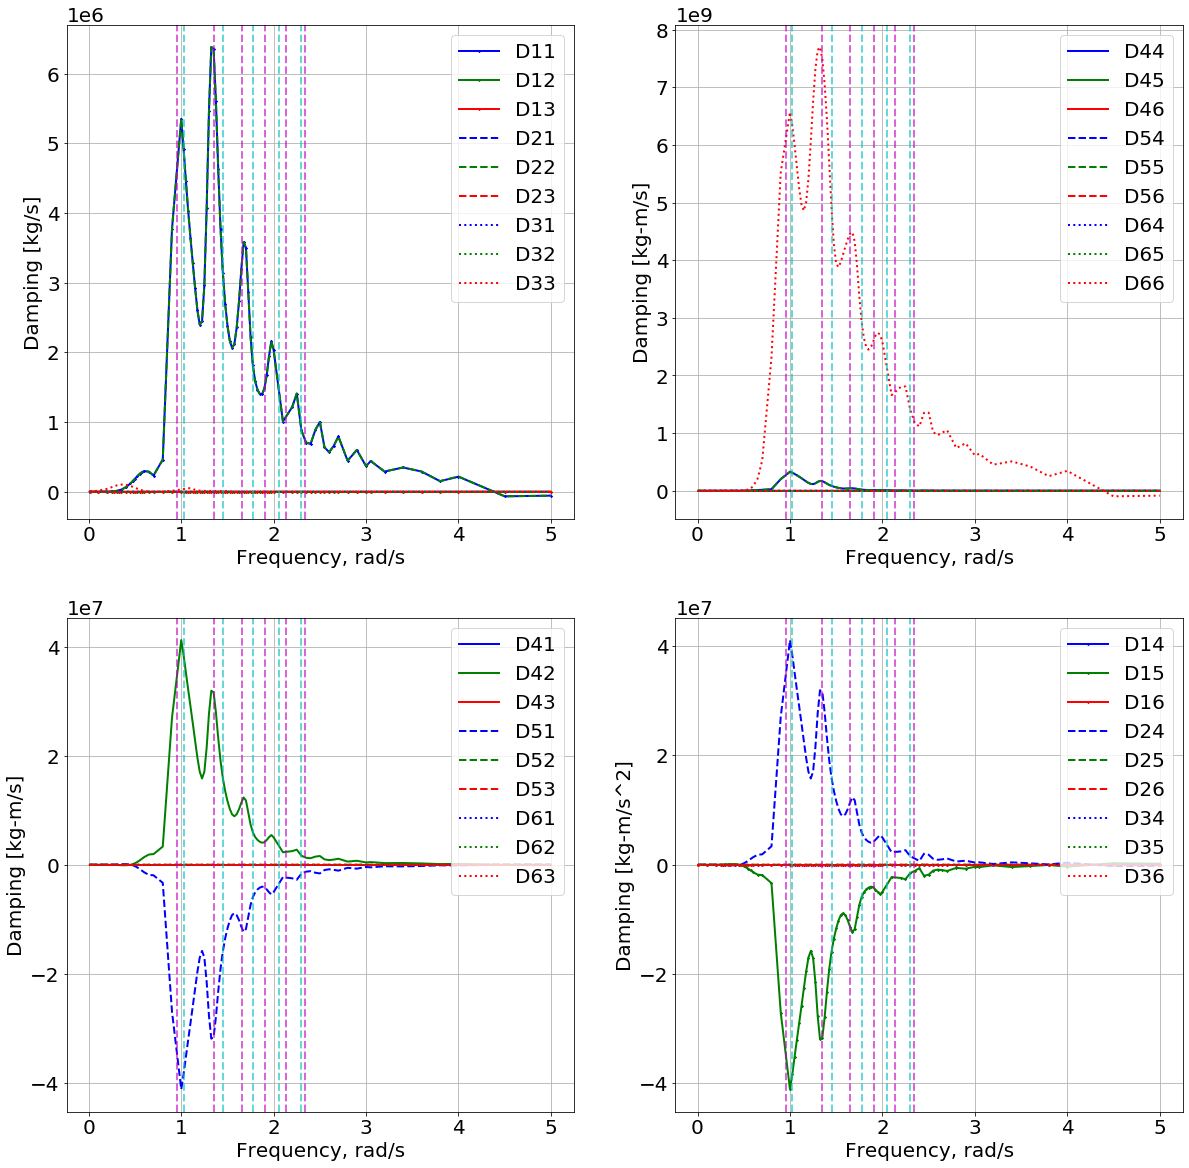

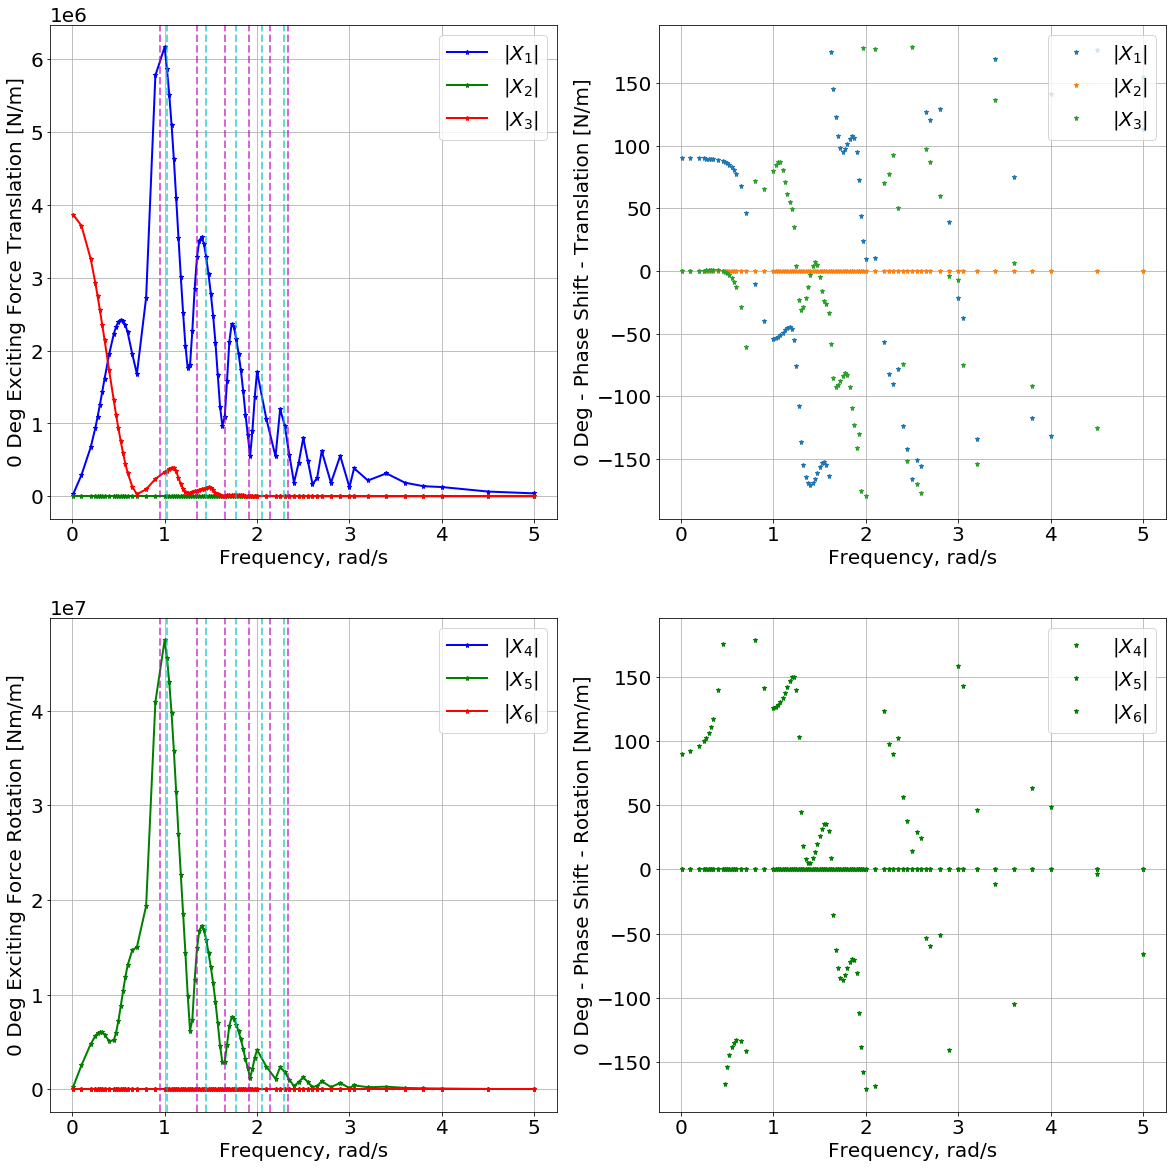

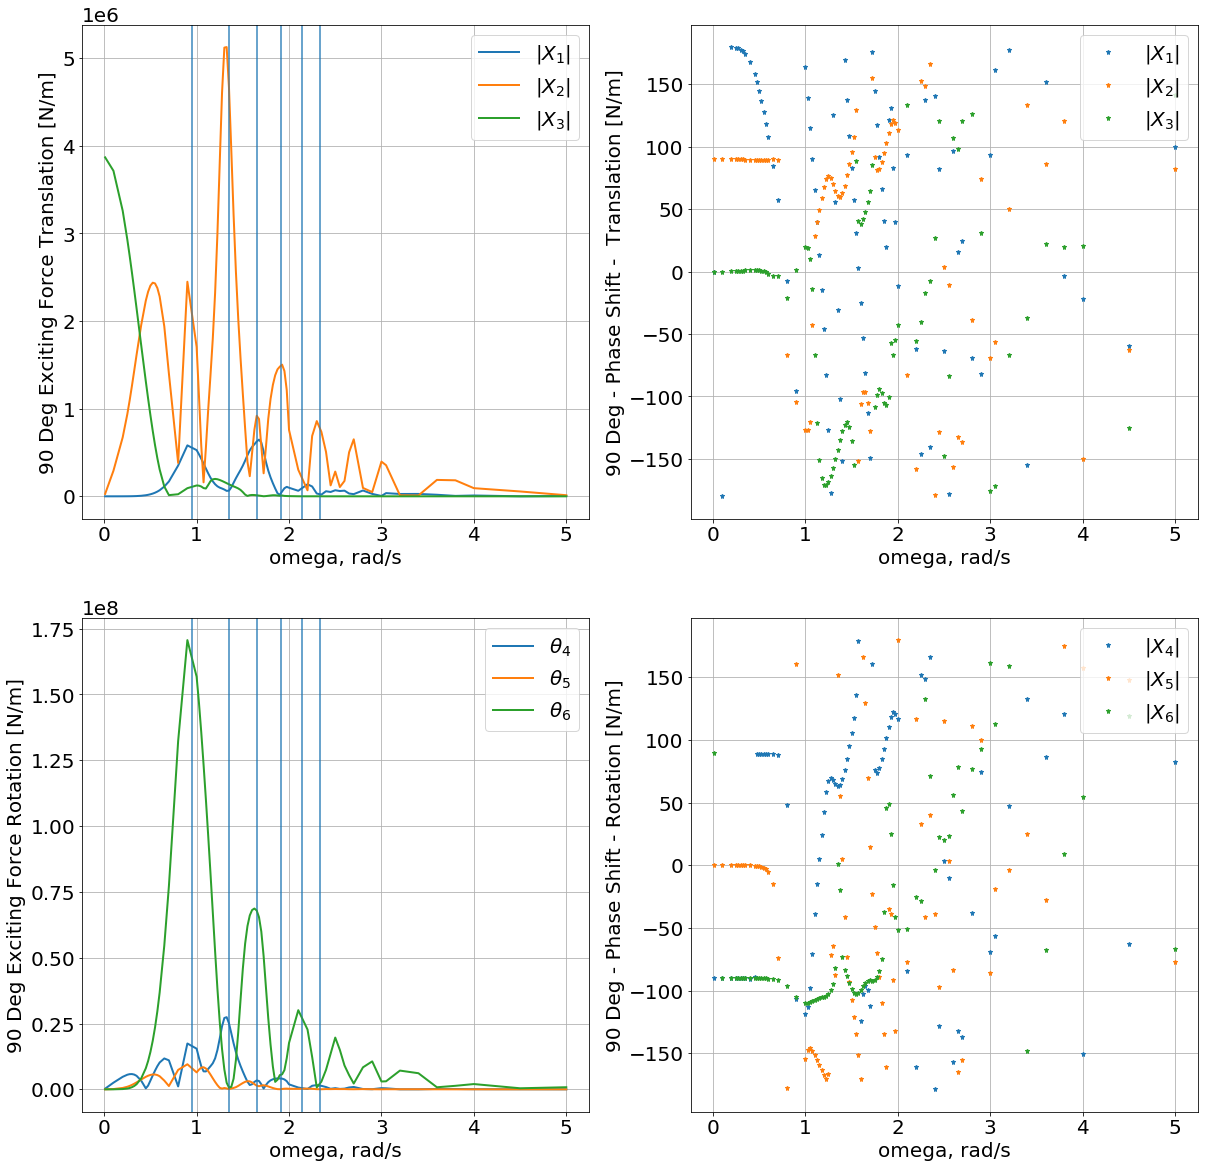

In [8]:
if write == 1:
    for dd in column_diameter:
        for xx in x_space:
            for yy in y_space:
                for zz in draft:
                    print('one')
                    file_loc = r'C:\Users\Joar\Documents\1_Education\NTNU\pickle_files'
                    file_name = "\sim_x_%.2f_y_%.2f_D%.2f_dr%.2f" % (xx,yy,dd,zz)
                    file_path = file_loc + file_name
                    mufp = FloaterParameters(xx,yy,dd,zz)
                    env = Environment()
                    rho = Density()
                    csa = Area(mufp)
                    buoy = Buoy(mufp, csa, rho)
                    mass = Mass(mufp, csa, buoy, rho)
                    coord = GlobalCoordinateSystem(mufp, csa, mass, rho, buoy, env)
                    hydrod_results = CompHydroCoefficient(coord, mass, mufp, run)
                    sim = ReadWadamLis(hydrod_results.HydroD_result,sectional_loads, reflection, fixed)
                    matrix = MatrixCalculation(coord, mass, mufp, rho, env, csa, buoy)
                    plot_hydroD_results(sim,mufp,env,1)
                    file_sim = open(file_path, 'wb') 
                    pickle.dump(sim, file_sim)
                    file_sim.close()

In [9]:
5397913.239 

5397913.239

In [10]:
5397913.239 

5397913.239

In [11]:
(5409822.549/5397913.239)*100

100.22062803666341

In [12]:
mufp = FloaterParameters(60,80,12,14)
env = Environment()
rho = Density()
csa = Area(mufp)
buoy = Buoy(mufp, csa, rho)
mass = Mass(mufp, csa, buoy, rho)
coord = GlobalCoordinateSystem(mufp, csa, mass, rho, buoy, env)
matrix = MatrixCalculation(coord, mass, mufp, rho, env, csa, buoy)

In [13]:
matrix.stiffness[0,0] = 1e6
matrix.stiffness[1,1] = 1e6
matrix.stiffness[5,5] = 1e9

In [14]:
print(pd.DataFrame(matrix.stiffness).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &          0 &          1 &             2 &             3 &             4 &             5 \\
\midrule
0 &  1000000.0 &        0.0 &  0.000000e+00 &  0.000000e+00 &  0.000000e+00 &  0.000000e+00 \\
1 &        0.0 &  1000000.0 &  0.000000e+00 &  0.000000e+00 &  0.000000e+00 &  0.000000e+00 \\
2 &        0.0 &        0.0 &  3.410501e+06 &  0.000000e+00 &  0.000000e+00 &  0.000000e+00 \\
3 &        0.0 &        0.0 &  0.000000e+00 &  2.535400e+09 &  0.000000e+00 &  0.000000e+00 \\
4 &        0.0 &        0.0 &  0.000000e+00 &  0.000000e+00 &  1.625933e+09 &  0.000000e+00 \\
5 &        0.0 &        0.0 &  0.000000e+00 &  0.000000e+00 &  0.000000e+00 &  1.000000e+09 \\
\bottomrule
\end{tabular}



In [15]:
(4927.86575*1025)/buoy.total

0.8273145495841245

In [16]:
mufp.draft

14

In [17]:
(5293.549027*1025)/mass.total

0.888707272306269

In [18]:
4927.86575 

4927.86575

In [19]:
rho.concrete

2500

In [20]:
mass.total/5051062.393

1.208730102294423

In [21]:
buoy.total

6105371.162986404

In [22]:
if pull_results == 1:
    # Pulling simulation results
    pull = np.array([30,30,12,14])
    results = []
    file_loc = r'E:\pickle_files'
    file_name = "\sim_x_%d_y_%d_D%d_dr%d" % (pull[0],pull[1],pull[2],pull[3])
    file_path = file_loc + file_name
    infile = open(file_path, 'rb')
    results.append(pickle.load(infile))
    infile.close()
    # Hand Calculations
    mufp = FloaterParameters(pull[0], pull[1], pull[2],pull[3])
    env = Environment()
    rho = Density()
    csa = Area(mufp)
    buoy = Buoy(mufp, csa, rho)
    mass = Mass(mufp, csa, buoy, rho)
    coord = GlobalCoordinateSystem(mufp, csa, mass, rho, buoy, env)
    plot_hydroD_results(results[0],mufp,env,1)
    matrix = MatrixCalculation(coord, mass, mufp, rho, env, csa, buoy)

In [23]:
pd.DataFrame(sim.MOTIONS[0,1,:,:])

,0,1,2,3
0,-0.000639,-1.876000,1.876000,-90.02
1,0.000000,0.000000,0.000000,0.00
2,1.000600,-0.000017,1.000600,-0.00
3,0.000000,0.000000,0.000000,0.00
4,-0.000058,0.002097,0.002098,91.58
5,0.000000,0.000000,0.000000,0.00


In [24]:
pd.DataFrame(sim.WAVEEX[0,0,:,:])

,0,1,2,3
0,1.272632e+01,28005.748167,2.800575e+04,89.97
1,0.000000e+00,0.000000,0.000000e+00,0.00
2,3.868139e+06,12.655517,3.868139e+06,0.00
3,0.000000e+00,0.000000,0.000000e+00,0.00
4,-2.194925e+02,257622.856567,2.576229e+05,90.05
5,0.000000e+00,0.000000,0.000000e+00,0.00


In [25]:
plt.figure()
plt.plot(sim.wave_disc[:, 4], sim.front_column_force[0,:,3], label='real - x')
plt.plot(sim.wave_disc[:, 4], sim.front_column_force[0,:,4], '-*', label='imag - x')
plt.plot(sim.wave_disc[:, 4], sim.front_column_force[0,:,5], label='abs - x')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Force [N]')
#plt.ylim([-5e6,1e7])
plt.legend()

IndexError: index 3 is out of bounds for axis 2 with size 3

<Figure size 1440x1440 with 0 Axes>

# Comparing Mass Matrix

In [ ]:
pd.DataFrame(sim.front_column[0,0,:,12:21])

In [ ]:
pd.DataFrame(sim.front_column_force[0,:,:])

In [ ]:
for ii in np.arange(0, sim.numheadangles, 1).astype(int):
    for jj in np.arange(0, sim.numwavelengths, 1).astype(int):
        sim.front_column_force[ii, jj, :] = np.sum(sim.front_column[ii, jj, :, 12:21], axis=0)

In [ ]:
#pd.set_option("precision", 3)

In [ ]:
mufp = FloaterParameters(60, 80, 12)
env = Environment()
rho = Density()
csa = Area(mufp)
buoy = Buoy(mufp, csa, rho)
mass = Mass(mufp, csa, buoy, rho)
coord = GeneralisedCoordinateSystem(mufp, csa, mass, rho, buoy, env)
matrix = MatrixCalculation(coord, mass, mufp, rho, env, csa, buoy)

In [ ]:
coord.COB

In [ ]:
coord.COM

In [ ]:
coord.mass_df 

In [ ]:
sum(coord.PoI_df['z']*coord.PoI_df['Mass [kg]'])

In [ ]:
coord.PoI_df.to_excel("PoI.xlsx", sheet_name='Sheet2')

In [ ]:
coord.mass_df.to_excel("mass.xlsx", sheet_name='Sheet2')